### Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Specify the CSV file path
csv_file = "BTCUSDT_15m_2022-01-01_to_2024-12-31.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Print the first 5 rows of the DataFrame
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2022-01-01 00:00:00,46210.57,46530.99,46210.55,46335.10,2905.234,2022-01-01 00:14:59.999,1.347054e+08,27576,1454.652,6.743572e+07,0
1,2022-01-01 00:15:00,46335.10,46422.00,46239.00,46378.60,1295.390,2022-01-01 00:29:59.999,6.003274e+07,15168,701.862,3.252544e+07,0
2,2022-01-01 00:30:00,46378.59,46698.15,46358.97,46607.10,2593.769,2022-01-01 00:44:59.999,1.207567e+08,26205,1525.996,7.105092e+07,0
3,2022-01-01 00:45:00,46607.10,46729.73,46567.49,46650.01,2163.072,2022-01-01 00:59:59.999,1.009500e+08,22318,1095.191,5.111755e+07,0
4,2022-01-01 01:00:00,46650.00,46774.16,46570.34,46771.93,1632.459,2022-01-01 01:14:59.999,7.618668e+07,18212,926.684,4.325673e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
105211,2024-12-31 22:45:00,93759.90,93774.50,93343.40,93469.10,1101.896,2024-12-31 22:59:59.999,1.030740e+08,21429,566.792,5.301962e+07,0
105212,2024-12-31 23:00:00,93469.10,93736.90,93356.60,93687.30,1187.226,2024-12-31 23:14:59.999,1.110001e+08,28282,684.324,6.397955e+07,0
105213,2024-12-31 23:15:00,93687.20,93725.00,93563.60,93702.00,458.254,2024-12-31 23:29:59.999,4.291360e+07,13621,232.878,2.180821e+07,0
105214,2024-12-31 23:30:00,93702.10,93715.40,93424.40,93478.40,746.116,2024-12-31 23:44:59.999,6.975949e+07,17888,311.404,2.911421e+07,0



$\text{EW-VWAP}t = \frac{\sum{i=1}^{t} e^{-\lambda (t-i)} \left(\frac{P_{H,i} + P_{L,i} + P_{C,i}}{3}\right) V_i}{\sum_{i=1}^{t} e^{-\lambda (t-i)} V_i}$

In [3]:
import pandas as pd
import numpy as np

def compute_ew_vwap(df, lam):
    price_avg = (df['high'] + df['low'] + df['close']) / 3.0
    volume = df['volume'].values
    
    n = len(df)
    numerator = np.empty(n)
    denominator = np.empty(n)
    
    numerator[0] = price_avg.iloc[0] * volume[0]
    denominator[0] = volume[0]
    
    # Pre-calculate the decay factor
    decay = np.exp(-lam)
    
    # Recursive calculation for t = 1 to n-1
    for t in range(1, n):
        numerator[t] = decay * numerator[t-1] + price_avg.iloc[t] * volume[t]
        denominator[t] = decay * denominator[t-1] + volume[t]
    
    # Compute EW-VWAP
    df = df.copy()
    df['EW_VWAP'] = numerator / denominator
    return df

lam = 1.5  # Set your lambda value
df = compute_ew_vwap(df, lam)
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EW_VWAP
0,2022-01-01 00:00:00,46210.57,46530.99,46210.55,46335.10,2905.234,2022-01-01 00:14:59.999,1.347054e+08,27576,1454.652,6.743572e+07,0,46358.880000
1,2022-01-01 00:15:00,46335.10,46422.00,46239.00,46378.60,1295.390,2022-01-01 00:29:59.999,6.003274e+07,15168,701.862,3.252544e+07,0,46350.651219
2,2022-01-01 00:30:00,46378.59,46698.15,46358.97,46607.10,2593.769,2022-01-01 00:44:59.999,1.207567e+08,26205,1525.996,7.105092e+07,0,46525.504210
3,2022-01-01 00:45:00,46607.10,46729.73,46567.49,46650.01,2163.072,2022-01-01 00:59:59.999,1.009500e+08,22318,1095.191,5.111755e+07,0,46619.669380
4,2022-01-01 01:00:00,46650.00,46774.16,46570.34,46771.93,1632.459,2022-01-01 01:14:59.999,7.618668e+07,18212,926.684,4.325673e+07,0,46681.490724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105211,2024-12-31 22:45:00,93759.90,93774.50,93343.40,93469.10,1101.896,2024-12-31 22:59:59.999,1.030740e+08,21429,566.792,5.301962e+07,0,93551.941735
105212,2024-12-31 23:00:00,93469.10,93736.90,93356.60,93687.30,1187.226,2024-12-31 23:14:59.999,1.110001e+08,28282,684.324,6.397955e+07,0,93585.660890
105213,2024-12-31 23:15:00,93687.20,93725.00,93563.60,93702.00,458.254,2024-12-31 23:29:59.999,4.291360e+07,13621,232.878,2.180821e+07,0,93631.089187
105214,2024-12-31 23:30:00,93702.10,93715.40,93424.40,93478.40,746.116,2024-12-31 23:44:59.999,6.975949e+07,17888,311.404,2.911421e+07,0,93556.841976



$S_t = \begin{cases}+1, & \text{if } P_{C,t-1} > \text{EW-VWAP}_{t-1}, \\-1, & \text{if } P{C,t-1} < \text{EW-VWAP}_{t-1} , \\S_{t-1}, & \text{otherwise}\end{cases}$

In [3]:
def compute_signal(df):
    """
    Compute the signal S_t based on the previous period's close and EW-VWAP.
    
    S_t = +1 if close_{t-1} > EW_VWAP_{t-1}
         -1 if close_{t-1} < EW_VWAP_{t-1}
         S_{t-1} otherwise

    Parameters:
        df (DataFrame): DataFrame that contains 'close' and 'EW_VWAP' columns.
        
    Returns:
        DataFrame: A new DataFrame with an additional 'signal' column.
    """
    df = df.copy()
    n = len(df)
    # Initialize an array to hold the signals
    signals = np.empty(n)
    
    # For the first period, assign a default value (e.g., +1)
    signals[0] = 1
    
    # Iterate over the DataFrame starting from the second row
    for t in range(1, n):
        # Get the previous period's close and EW-VWAP
        prev_close = df.iloc[t-1]['close']
        prev_ewvwap = df.iloc[t-1]['EW_VWAP']
        
        if prev_close > prev_ewvwap:
            signals[t] = 1
        elif prev_close < prev_ewvwap:
            signals[t] = -1
        else:
            signals[t] = signals[t-1]
    
    df['signal'] = signals
    return df

In [4]:
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EW_VWAP
0,2022-01-01 00:00:00,46210.57,46530.99,46210.55,46335.10,2905.234,2022-01-01 00:14:59.999,1.347054e+08,27576,1454.652,6.743572e+07,0,46358.880000
1,2022-01-01 00:15:00,46335.10,46422.00,46239.00,46378.60,1295.390,2022-01-01 00:29:59.999,6.003274e+07,15168,701.862,3.252544e+07,0,46350.651219
2,2022-01-01 00:30:00,46378.59,46698.15,46358.97,46607.10,2593.769,2022-01-01 00:44:59.999,1.207567e+08,26205,1525.996,7.105092e+07,0,46525.504210
3,2022-01-01 00:45:00,46607.10,46729.73,46567.49,46650.01,2163.072,2022-01-01 00:59:59.999,1.009500e+08,22318,1095.191,5.111755e+07,0,46619.669380
4,2022-01-01 01:00:00,46650.00,46774.16,46570.34,46771.93,1632.459,2022-01-01 01:14:59.999,7.618668e+07,18212,926.684,4.325673e+07,0,46681.490724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105211,2024-12-31 22:45:00,93759.90,93774.50,93343.40,93469.10,1101.896,2024-12-31 22:59:59.999,1.030740e+08,21429,566.792,5.301962e+07,0,93551.941735
105212,2024-12-31 23:00:00,93469.10,93736.90,93356.60,93687.30,1187.226,2024-12-31 23:14:59.999,1.110001e+08,28282,684.324,6.397955e+07,0,93585.660890
105213,2024-12-31 23:15:00,93687.20,93725.00,93563.60,93702.00,458.254,2024-12-31 23:29:59.999,4.291360e+07,13621,232.878,2.180821e+07,0,93631.089187
105214,2024-12-31 23:30:00,93702.10,93715.40,93424.40,93478.40,746.116,2024-12-31 23:44:59.999,6.975949e+07,17888,311.404,2.911421e+07,0,93556.841976


### Equity Curve

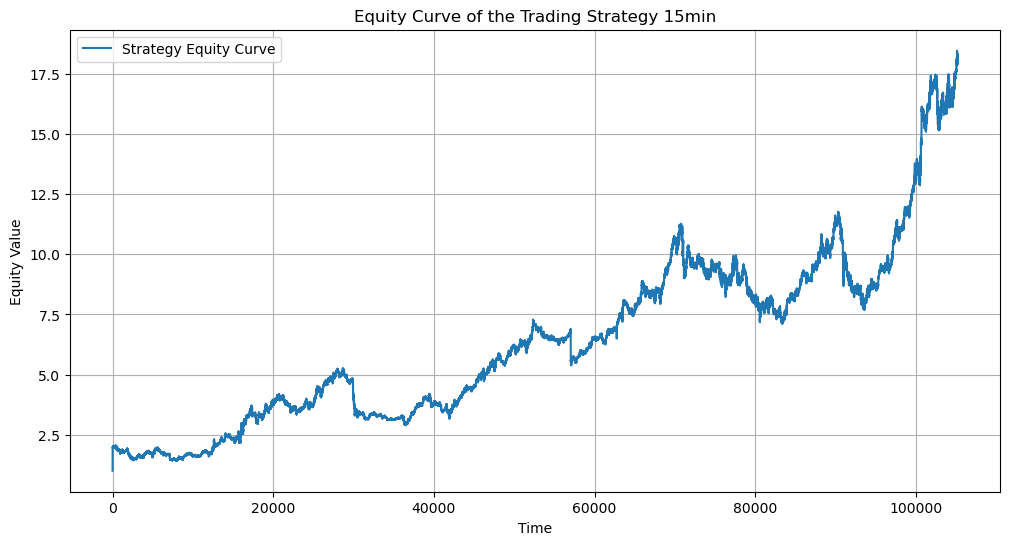

In [5]:
import matplotlib.pyplot as plt

def compute_signal(df):
    """
    Compute the signal S_t based on the previous period's close and EW-VWAP.
    
    S_t = +1 if close_{t-1} > EW_VWAP_{t-1}
         -1 if close_{t-1} < EW_VWAP_{t-1}
         S_{t-1} otherwise
    """
    df = df.copy()
    n = len(df)
    signals = np.empty(n)
    signals[0] = 1000  # Initialize first signal as +1
    
    for t in range(1, n):
        prev_close = df.iloc[t-1]['close']
        prev_ewvwap = df.iloc[t-1]['EW_VWAP']
        if prev_close < prev_ewvwap:
            signals[t] = 1
        elif prev_close > prev_ewvwap:
            signals[t] = -1
        else:
            signals[t] = signals[t-1]
    
    df['signal'] = signals
    return df

df = compute_signal(df)

df['asset_return'] = df['close'].pct_change()
df['strategy_return'] = df['asset_return'] * df['signal'].shift(1)

df['equity_curve'] = (1 + df['strategy_return'].fillna(0)).cumprod()

# Plot the equity curve.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['equity_curve'], label='Strategy Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity Value')
plt.title('Equity Curve of the Trading Strategy 15min')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import pandas as pd
import numpy as np

def ew_vwap(df, lam):
    price_avg = (df['high'] + df['low'] + df['close']) / 3
    vol       = df['volume']
    decay     = np.exp(-lam)

    num = price_avg.mul(vol)
    den = vol

    # 指數遞迴：x_t = vol_t * price_t + decay * x_{t-1}
    num = num.ewm(alpha=1-decay, adjust=False).mean()
    den = den.ewm(alpha=1-decay, adjust=False).mean()

    df['EW_VWAP'] = num / den
    return df

def gen_signal(df):
    sig = np.sign(df['EW_VWAP'].shift(1) - df['close'].shift(1)) * -1
    # 上面一行：若 close_{t-1} < EWVWAP_{t-1} 則 (‑) → ×‑1 = +1 (做多)
    sig.iloc[0] = 0          # 第一筆空倉
    return sig

def backtest(df, lam=1.5, fee=0.0002):
    df = ew_vwap(df, lam)
    df['signal'] = gen_signal(df)

    ret_asset   = df['close'].pct_change()
    ret_strat   = df['signal'].shift(1) * ret_asset
    turnover    = (df['signal'].diff().abs()).fillna(0)  # 進出次數
    ret_after   = ret_strat - turnover * fee             # 扣成本

    df['equity'] = (1 + ret_after.fillna(0)).cumprod()
    return df


In [7]:
print(df.columns)

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore', 'EW_VWAP', 'signal',
       'asset_return', 'strategy_return', 'equity_curve', 'signal_diff'],
      dtype='object')


/var/folders/b6/fb60dc_d6bx6dt630rrghmbc0000gn/T/ipykernel_2410/1583613738.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['signal_diff'] = subset['signal'].diff()


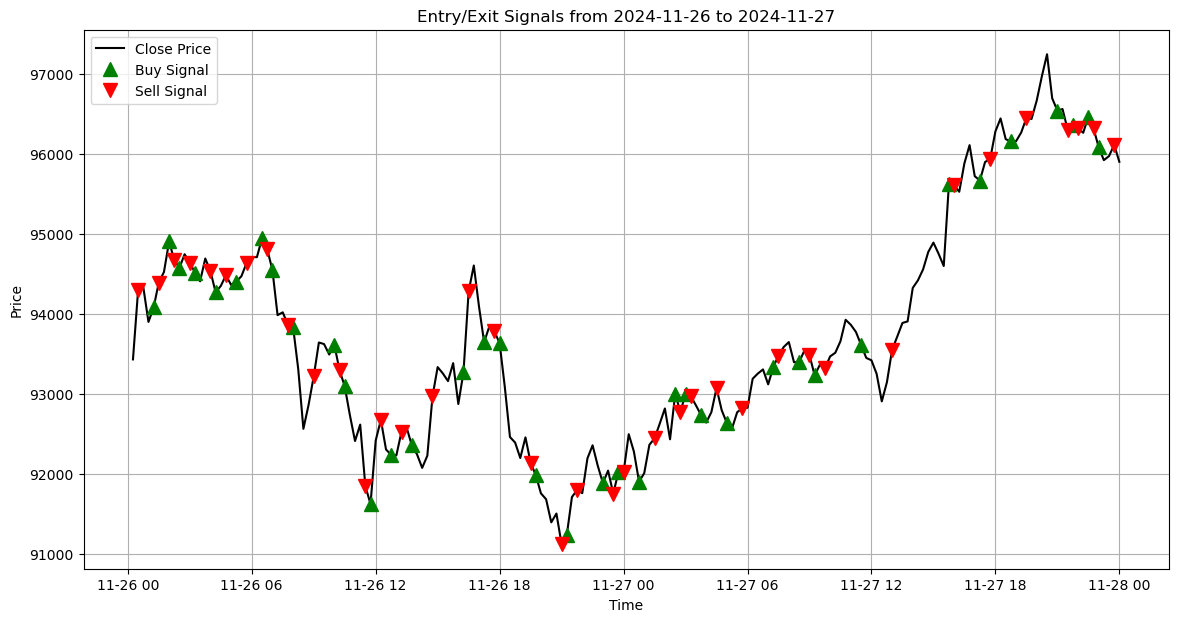

In [8]:
df.columns = df.columns.str.strip()

# Check if 'close_time' is present in the columns
if 'close_time' in df.columns:
    df['close_time'] = pd.to_datetime(df['close_time'])
    df.set_index('close_time', inplace=True)
else:
    # If 'close_time' is not found, check if it's already the index or use another datetime column.
    print("Column 'close_time' not found in DataFrame columns. Available columns:", df.columns.tolist())
    # You might try converting the current index if it holds datetime values:
    df.index = pd.to_datetime(df.index)

# Now continue with the rest of your code...
# For example, plotting entry/exit signals for a given date range:
subset = df.loc['2024-11-26':'2024-11-27']
subset['signal_diff'] = subset['signal'].diff()
buy_signals = subset[subset['signal_diff'] > 0]
sell_signals = subset[subset['signal_diff'] < 0]

plt.figure(figsize=(14, 7))
plt.plot(subset.index, subset['close'], label='Close Price', color='black', lw=1.5)
plt.plot(buy_signals.index, buy_signals['close'], '^', markersize=10, color='green', label='Buy Signal')
plt.plot(sell_signals.index, sell_signals['close'], 'v', markersize=10, color='red', label='Sell Signal')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Entry/Exit Signals from 2024-11-26 to 2024-11-27')
plt.legend()
plt.grid(True)
plt.show()

### 5min

### 60min Resample

In [13]:
import pandas as pd

# Specify the CSV file path
csv_file = "BTCUSDT_15m_2022-01-01_to_2024-12-31.csv"

# Read the CSV file into a DataFrame and parse the 'open_time' column as datetime
df = pd.read_csv(csv_file, parse_dates=["open_time"])

# Set 'open_time' as the index
df.set_index("open_time", inplace=True)

# Resample the 15-minute data into 60-minute bars
df_60min = df.resample("5T").agg({
    "open": "first",                       # First open in the 60-min interval
    "high": "max",                         # Highest value in the interval
    "low": "min",                          # Lowest value in the interval
    "close": "last",                       # Last close in the interval
    "volume": "sum",                       # Sum volume over the interval
    "close_time": "last",                  # Last close_time in the interval
    "quote_asset_volume": "sum",           # Sum quote_asset_volume
    "number_of_trades": "sum",             # Sum number_of_trades
    "taker_buy_base_asset_volume": "sum",  # Sum taker_buy_base_asset_volume
    "taker_buy_quote_asset_volume": "sum", # Sum taker_buy_quote_asset_volume
    "ignore": "first"                      # Using first value for 'ignore' (or you can drop this column)
})

# Optionally, reset the index if needed
df_60min = df_60min.reset_index()

# Display the first few rows of the 60-minute DataFrame
df_60min

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2022-01-01 00:00:00,46210.57,46530.99,46210.55,46335.1,2905.234,2022-01-01 00:14:59.999,1.347054e+08,27576,1454.652,6.743572e+07,0.0
1,2022-01-01 00:05:00,NaN,NaN,NaN,NaN,0.000,None,0.000000e+00,0,0.000,0.000000e+00,NaN
2,2022-01-01 00:10:00,NaN,NaN,NaN,NaN,0.000,None,0.000000e+00,0,0.000,0.000000e+00,NaN
3,2022-01-01 00:15:00,46335.10,46422.00,46239.00,46378.6,1295.390,2022-01-01 00:29:59.999,6.003274e+07,15168,701.862,3.252544e+07,0.0
4,2022-01-01 00:20:00,NaN,NaN,NaN,NaN,0.000,None,0.000000e+00,0,0.000,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
315641,2024-12-31 23:25:00,NaN,NaN,NaN,NaN,0.000,None,0.000000e+00,0,0.000,0.000000e+00,NaN
315642,2024-12-31 23:30:00,93702.10,93715.40,93424.40,93478.4,746.116,2024-12-31 23:44:59.999,6.975949e+07,17888,311.404,2.911421e+07,0.0
315643,2024-12-31 23:35:00,NaN,NaN,NaN,NaN,0.000,None,0.000000e+00,0,0.000,0.000000e+00,NaN
315644,2024-12-31 23:40:00,NaN,NaN,NaN,NaN,0.000,None,0.000000e+00,0,0.000,0.000000e+00,NaN


In [11]:
import numpy as np

def compute_signal(df):
    """
    Compute the signal S_t based on the previous period's close and EW-VWAP.
    
    S_t = +1 if close_{t-1} > EW_VWAP_{t-1}
         -1 if close_{t-1} < EW_VWAP_{t-1}
         S_{t-1} otherwise

    Parameters:
        df (DataFrame): DataFrame that contains 'close' and 'EW_VWAP' columns.
        
    Returns:
        DataFrame: A new DataFrame with an additional 'signal' column.
    """
    df = df.copy()
    n = len(df)
    signals = np.empty(n)
    
    # For the first period, assign a default value (e.g., +1)
    signals[0] = 1
    
    # Iterate over the DataFrame starting from the second row
    for t in range(1, n):
        prev_close = df.iloc[t-1]['close']
        prev_ewvwap = df.iloc[t-1]['EW_VWAP']
        
        if prev_close > prev_ewvwap:
            signals[t] = 1
        elif prev_close < prev_ewvwap:
            signals[t] = -1
        else:
            signals[t] = signals[t-1]
    
    df['signal'] = signals
    return df

# Assuming df_60min already has 'close' and 'EW_VWAP' columns,
# apply the compute_signal function to it.
df_60min = compute_signal(df_60min)

# Display the first few rows to verify the signal column has been added.
df_60min

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EW_VWAP,signal
0,2022-01-01 00:00:00,46210.57,46530.99,46210.55,46378.60,4200.624,2022-01-01 00:29:59.999,1.947381e+08,42744,2156.514,9.996116e+07,0,46373.380000,1.0
1,2022-01-01 00:30:00,46378.59,46729.73,46358.97,46650.01,4756.841,2022-01-01 00:59:59.999,2.217067e+08,48523,2621.187,1.221685e+08,0,46545.629945,1.0
2,2022-01-01 01:00:00,46650.00,46944.56,46570.34,46799.99,4458.342,2022-01-01 01:29:59.999,2.085629e+08,46028,2338.457,1.093956e+08,0,46721.508422,1.0
3,2022-01-01 01:30:00,46799.99,46868.00,46705.87,46766.78,2817.907,2022-01-01 01:59:59.999,1.318176e+08,27280,1351.380,6.322335e+07,0,46761.895786,1.0
4,2022-01-01 02:00:00,46767.44,46917.87,46759.65,46810.24,2537.671,2022-01-01 02:29:59.999,1.188792e+08,25406,1266.014,5.931118e+07,0,46811.417335,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2024-12-31 21:30:00,93595.80,93950.00,93576.70,93881.30,1163.440,2024-12-31 21:59:59.999,1.091725e+08,29100,637.441,5.981672e+07,0,93752.754494,-1.0
52604,2024-12-31 22:00:00,93881.30,93881.30,93558.90,93715.50,1349.205,2024-12-31 22:29:59.999,1.264075e+08,24802,499.752,4.682274e+07,0,93726.266663,1.0
52605,2024-12-31 22:30:00,93715.50,93822.10,93343.40,93469.10,1554.027,2024-12-31 22:59:59.999,1.454365e+08,32092,786.113,7.357106e+07,0,93581.150860,-1.0
52606,2024-12-31 23:00:00,93469.10,93736.90,93356.60,93702.00,1645.480,2024-12-31 23:29:59.999,1.539137e+08,41903,917.202,8.578776e+07,0,93594.882759,-1.0


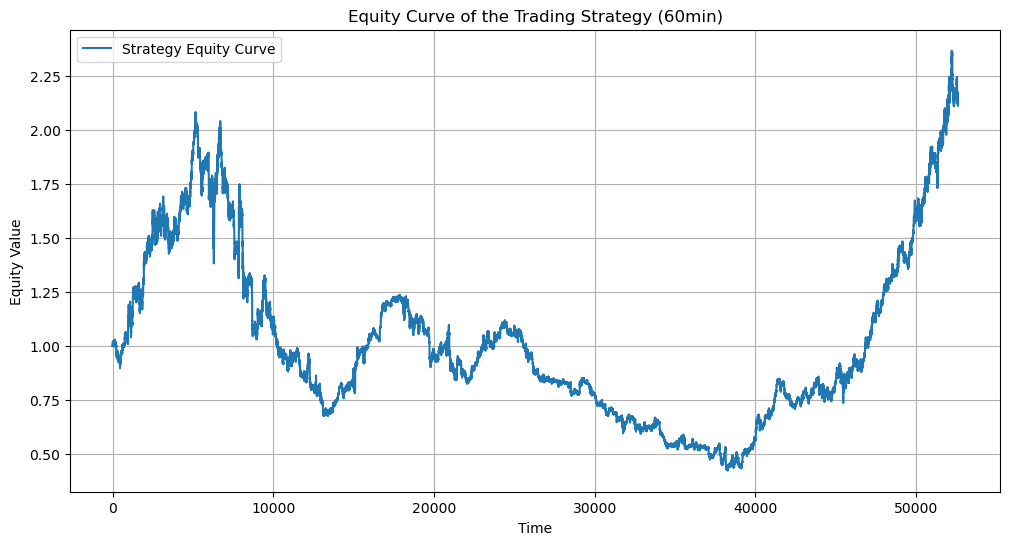

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def compute_signal(df):
    """
    Compute the signal S_t based on the previous period's close and EW-VWAP.
    
    S_t = +1 if close_{t-1} > EW-VWAP_{t-1}
         -1 if close_{t-1} < EW-VWAP_{t-1}
         S_{t-1} otherwise
    """
    df = df.copy()
    n = len(df)
    signals = np.empty(n)
    signals[0] = 1  # Initialize first signal as +1
    
    for t in range(1, n):
        prev_close = df.iloc[t-1]['close']
        prev_ewvwap = df.iloc[t-1]['EW_VWAP']
        if prev_close < prev_ewvwap:
            signals[t] = 1
        elif prev_close > prev_ewvwap:
            signals[t] = -1
        else:
            signals[t] = signals[t-1]
    
    df['signal'] = signals
    return df

# Apply the signal computation on the 60-minute DataFrame
df_60min = compute_signal(df_60min)

# Calculate asset returns and strategy returns on the 60-minute data.
df_60min['asset_return'] = df_60min['close'].pct_change()
# Use the previous signal to determine the position for the current period.
df_60min['strategy_return'] = df_60min['asset_return'] * df_60min['signal'].shift(1)

# Calculate the equity curve starting from an initial capital of 1.
df_60min['equity_curve'] = (1 + df_60min['strategy_return'].fillna(0)).cumprod()

# Plot the equity curve.
plt.figure(figsize=(12, 6))
plt.plot(df_60min.index, df_60min['equity_curve'], label='Strategy Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity Value')
plt.title('Equity Curve of the Trading Strategy (60min)')
plt.legend()
plt.grid(True)
plt.show()

### 4hour

In [164]:
import pandas as pd

# Resample into 4-hour bars ('240T' means 240 minutes, which is 4 hours)
df_4h = df.resample('240T').agg({
    "open": "first",                       # Open price from the first row in the interval
    "high": "max",                         # Maximum price in the interval
    "low": "min",                          # Minimum price in the interval
    "close": "last",                       # Close price from the last row in the interval
    "volume": "sum",                       # Total volume over the interval
    "close_time": "last",                  # Close time from the last row
    "quote_asset_volume": "sum",           # Sum of quote asset volume
    "number_of_trades": "sum",             # Total number of trades
    "taker_buy_base_asset_volume": "sum",  # Sum of taker buy base asset volume
    "taker_buy_quote_asset_volume": "sum", # Sum of taker buy quote asset volume
    "ignore": "first"                      # Use the first value for 'ignore'
})

# Optionally, reset index to view the datetime column
df_4h = df_4h.reset_index()

# Display the first few rows of the 4-hour resampled DataFrame
df_4h

KeyError: "Column(s) ['close_time'] do not exist"

In [104]:
# 4hr Timeframe
import numpy as np

def compute_ew_vwap(df, lam):
    price_avg = (df['high'] + df['low'] + df['close']) / 3.0
    volume = df['volume'].values
    
    n = len(df)
    numerator = np.empty(n)
    denominator = np.empty(n)
    
    numerator[0] = price_avg.iloc[0] * volume[0]
    denominator[0] = volume[0]
    
    decay = np.exp(-lam)
    
    for t in range(1, n):
        numerator[t] = decay * numerator[t-1] + price_avg.iloc[t] * volume[t]
        denominator[t] = decay * denominator[t-1] + volume[t]
        df = df.copy()
    df['EW_VWAP'] = numerator / denominator
    return df

lam = 1.5  # Your chosen lambda value
df_4h = compute_ew_vwap(df_4h, lam)

df_4h

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EW_VWAP
0,2022-01-01 00:00:00,46210.57,46944.56,46210.55,46789.56,24921.419,2022-01-01 03:59:59.999,1.163591e+09,250048,12498.910,5.835198e+08,0,46648.223333
1,2022-01-01 04:00:00,46789.55,47566.66,46605.00,47186.83,34840.019,2022-01-01 07:59:59.999,1.640482e+09,336846,17871.343,8.416153e+08,0,47054.631043
2,2022-01-01 08:00:00,47186.83,47338.00,46700.09,46755.01,29421.287,2022-01-01 11:59:59.999,1.383157e+09,307536,14048.192,6.605934e+08,0,46960.021506
3,2022-01-01 12:00:00,46755.01,47488.64,46755.01,47194.78,28293.730,2022-01-01 15:59:59.999,1.332222e+09,303405,14319.742,6.743331e+08,0,47102.850071
4,2022-01-01 16:00:00,47194.77,47943.77,47157.59,47326.98,38466.496,2022-01-01 19:59:59.999,1.828153e+09,401014,18932.078,8.997758e+08,0,47410.348841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,2024-12-31 04:00:00,92481.50,93000.00,92315.40,92819.60,11095.688,2024-12-31 07:59:59.999,1.028385e+09,287973,5344.429,4.953819e+08,0,92751.793058
6572,2024-12-31 08:00:00,92819.50,94738.40,92800.00,94202.50,36509.765,2024-12-31 11:59:59.999,3.432489e+09,631250,19122.877,1.797574e+09,0,93798.667749
6573,2024-12-31 12:00:00,94202.40,96254.30,94202.40,95389.40,58306.271,2024-12-31 15:59:59.999,5.561752e+09,1026370,30429.683,2.902690e+09,0,95082.898657
6574,2024-12-31 16:00:00,95389.30,95569.60,93145.10,94155.80,41481.273,2024-12-31 19:59:59.999,3.909534e+09,818491,20889.653,1.968483e+09,0,94500.976706


In [105]:
import numpy as np

def compute_signal(df):
    """
    Compute the signal S_t based on the previous period's close and EW-VWAP.
    
    S_t = +1 if close_{t-1} > EW_VWAP_{t-1}
         -1 if close_{t-1} < EW_VWAP_{t-1}
         S_{t-1} otherwise

    Parameters:
        df (DataFrame): DataFrame that contains 'close' and 'EW_VWAP' columns.
        
    Returns:
        DataFrame: A new DataFrame with an additional 'signal' column.
    """
    df = df.copy()
    n = len(df)
    signals = np.empty(n)
    
    # For the first period, assign a default value (e.g., +1)
    signals[0] = 1
    
    # Iterate over the DataFrame starting from the second row
    for t in range(1, n):
        prev_close = df.iloc[t-1]['close']
        prev_ewvwap = df.iloc[t-1]['EW_VWAP']
        
        if prev_close > prev_ewvwap:
            signals[t] = 1
        elif prev_close < prev_ewvwap:
            signals[t] = -1
        else:
            signals[t] = signals[t-1]
    
    df['signal'] = signals
    return df


df_4h = compute_signal(df_4h)
df_4h

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EW_VWAP,signal
0,2022-01-01 00:00:00,46210.57,46944.56,46210.55,46789.56,24921.419,2022-01-01 03:59:59.999,1.163591e+09,250048,12498.910,5.835198e+08,0,46648.223333,1.0
1,2022-01-01 04:00:00,46789.55,47566.66,46605.00,47186.83,34840.019,2022-01-01 07:59:59.999,1.640482e+09,336846,17871.343,8.416153e+08,0,47054.631043,1.0
2,2022-01-01 08:00:00,47186.83,47338.00,46700.09,46755.01,29421.287,2022-01-01 11:59:59.999,1.383157e+09,307536,14048.192,6.605934e+08,0,46960.021506,1.0
3,2022-01-01 12:00:00,46755.01,47488.64,46755.01,47194.78,28293.730,2022-01-01 15:59:59.999,1.332222e+09,303405,14319.742,6.743331e+08,0,47102.850071,-1.0
4,2022-01-01 16:00:00,47194.77,47943.77,47157.59,47326.98,38466.496,2022-01-01 19:59:59.999,1.828153e+09,401014,18932.078,8.997758e+08,0,47410.348841,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,2024-12-31 04:00:00,92481.50,93000.00,92315.40,92819.60,11095.688,2024-12-31 07:59:59.999,1.028385e+09,287973,5344.429,4.953819e+08,0,92751.793058,-1.0
6572,2024-12-31 08:00:00,92819.50,94738.40,92800.00,94202.50,36509.765,2024-12-31 11:59:59.999,3.432489e+09,631250,19122.877,1.797574e+09,0,93798.667749,1.0
6573,2024-12-31 12:00:00,94202.40,96254.30,94202.40,95389.40,58306.271,2024-12-31 15:59:59.999,5.561752e+09,1026370,30429.683,2.902690e+09,0,95082.898657,1.0
6574,2024-12-31 16:00:00,95389.30,95569.60,93145.10,94155.80,41481.273,2024-12-31 19:59:59.999,3.909534e+09,818491,20889.653,1.968483e+09,0,94500.976706,1.0


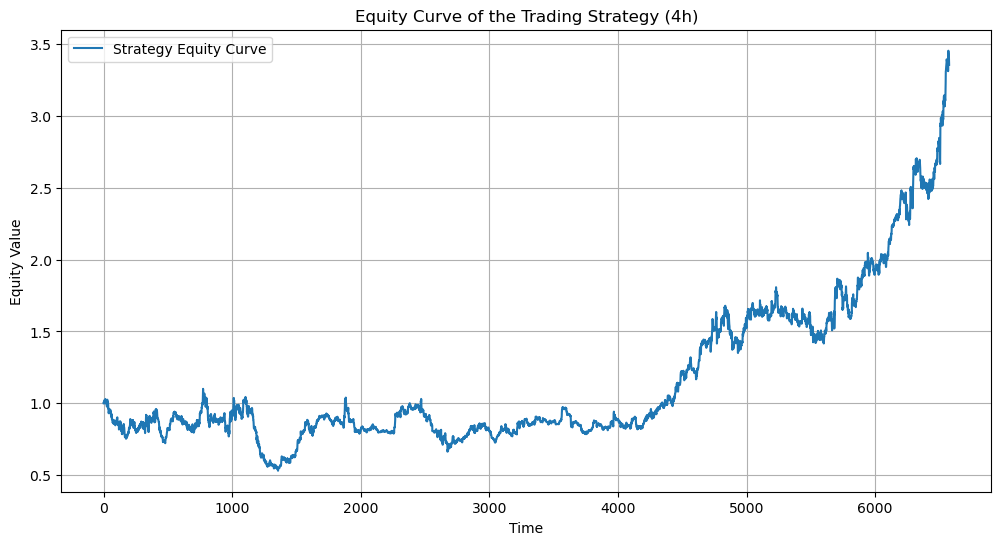

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def compute_signal(df):
    """
    Compute the signal S_t based on the previous period's close and EW-VWAP.
    
    S_t = +1 if close_{t-1} > EW-VWAP_{t-1}
         -1 if close_{t-1} < EW-VWAP_{t-1}
         S_{t-1} otherwise
    """
    df = df.copy()
    n = len(df)
    signals = np.empty(n)
    signals[0] = 1  # Initialize first signal as +1
    
    for t in range(1, n):
        prev_close = df.iloc[t-1]['close']
        prev_ewvwap = df.iloc[t-1]['EW_VWAP']
        if prev_close > prev_ewvwap:
            signals[t] = 1
        elif prev_close < prev_ewvwap:
            signals[t] = -1
        else:
            signals[t] = signals[t-1]
    
    df['signal'] = signals
    return df

# Apply the signal computation on the 60-minute DataFrame
df_4h = compute_signal(df_4h)

# Calculate asset returns and strategy returns on the 60-minute data.
df_4h['asset_return'] = df_4h['close'].pct_change()
# Use the previous signal to determine the position for the current period.
df_4h['strategy_return'] = df_4h['asset_return'] * df_4h['signal'].shift(1)

# Calculate the equity curve starting from an initial capital of 1.
df_4h['equity_curve'] = (1 + df_4h['strategy_return'].fillna(0)).cumprod()

# Plot the equity curve.
plt.figure(figsize=(12, 6))
plt.plot(df_4h.index, df_4h['equity_curve'], label='Strategy Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity Value')
plt.title('Equity Curve of the Trading Strategy (4h)')
plt.legend()
plt.grid(True)
plt.show()

### Signal Tests

### 15min K

In [140]:
def generate_signals(df):
    """
    Generate trading signals using EW-VWAP for a 15-minute DataFrame, avoiding look-ahead bias.
    
    Trading is only allowed if the bar's timestamp is later than 00:30:00 on each day.
    
    The signal is defined as:
      - signal = +1 if the previous bar's close > previous bar's EW-VWAP
      - signal = -1 if the previous bar's close < previous bar's EW-VWAP
      - signal remains unchanged otherwise.
      
    The trade_signal is defined as the difference (change) in the signal.
    """
    df = df.copy()
    
    # Ensure that the index is datetime. If not, adjust accordingly.
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DatetimeIndex.")
    
    # Create a 'date' column from the index for grouping (if not already present)
    df['date'] = df.index.date
    
    # Create a trading time mask: only trade when the bar time is later than 00:30:00
    trading_mask = df.groupby('date').apply(
        lambda x: pd.Series(x.index.time > pd.Timestamp('00:30:00').time(), index=x.index)
    ).reset_index(level=0, drop=True)
    
    # Use lagged values to compute the signal
    df['signal'] = 0
    df.loc[df['close'].shift(1) > df['EW_VWAP'].shift(1), 'signal'] = 1
    df.loc[df['close'].shift(1) < df['EW_VWAP'].shift(1), 'signal'] = -1
    
    # Calculate the trade signal (change in signal)
    df['trade_signal'] = df['signal'].diff()
    
    # Apply trading time restriction: only keep trade signals during allowed trading hours.
    df.loc[~trading_mask, 'trade_signal'] = 0
    
    return df

In [141]:
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EW_VWAP,signal,asset_return,strategy_return,equity_curve,signal_diff
close_time,,,,,,,,,,,,,,,,
2022-01-01 00:14:59.999,46210.57,46530.99,46210.55,46335.10,2905.234,1.347054e+08,27576,1454.652,6.743572e+07,0,46358.880000,1.0,NaN,NaN,1.000000,NaN
2022-01-01 00:29:59.999,46335.10,46422.00,46239.00,46378.60,1295.390,6.003274e+07,15168,701.862,3.252544e+07,0,46350.651219,-1.0,0.000939,0.000939,1.000939,-2.0
2022-01-01 00:44:59.999,46378.59,46698.15,46358.97,46607.10,2593.769,1.207567e+08,26205,1525.996,7.105092e+07,0,46525.504210,1.0,0.004927,-0.004927,0.996007,2.0
2022-01-01 00:59:59.999,46607.10,46729.73,46567.49,46650.01,2163.072,1.009500e+08,22318,1095.191,5.111755e+07,0,46619.669380,1.0,0.000921,0.000921,0.996924,0.0
2022-01-01 01:14:59.999,46650.00,46774.16,46570.34,46771.93,1632.459,7.618668e+07,18212,926.684,4.325673e+07,0,46681.490724,1.0,0.002614,0.002614,0.999530,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 22:59:59.999,93759.90,93774.50,93343.40,93469.10,1101.896,1.030740e+08,21429,566.792,5.301962e+07,0,93551.941735,1.0,-0.003103,-0.003103,0.043812,0.0
2024-12-31 23:14:59.999,93469.10,93736.90,93356.60,93687.30,1187.226,1.110001e+08,28282,684.324,6.397955e+07,0,93585.660890,-1.0,0.002334,0.002334,0.043914,-2.0
2024-12-31 23:29:59.999,93687.20,93725.00,93563.60,93702.00,458.254,4.291360e+07,13621,232.878,2.180821e+07,0,93631.089187,1.0,0.000157,-0.000157,0.043907,2.0


In [142]:
print("\nEW-VWAP Calculation Debug Info:")

# Use the EW-VWAP column
ew_vwap_series = df['EW_VWAP']

# Display summary statistics
desc = ew_vwap_series.describe()
print("Summary Statistics:")
print(desc)

# Check for missing values
nan_count = ew_vwap_series.isna().sum()
print(f"\nMissing EW-VWAP values: {nan_count} out of {len(ew_vwap_series)} total entries.")

# Print the range in a formatted manner
print("\nEW-VWAP Range:")
print(f"Min: {ew_vwap_series.min():.2f}, Max: {ew_vwap_series.max():.2f}")

# Show sample values from the beginning and end of the series
print("\nSample EW-VWAP Values (First 5):")
print(ew_vwap_series.head(5))
print("\nSample EW-VWAP Values (Last 5):")
print(ew_vwap_series.tail(5))


EW-VWAP Calculation Debug Info:
Summary Statistics:
count    105216.000000
mean      40991.507527
std       20715.499688
min       15627.118555
25%       24758.515781
50%       35056.580464
75%       59025.814635
max      107978.008858
Name: EW_VWAP, dtype: float64

Missing EW-VWAP values: 0 out of 105216 total entries.

EW-VWAP Range:
Min: 15627.12, Max: 107978.01

Sample EW-VWAP Values (First 5):
close_time
2022-01-01 00:14:59.999    46358.880000
2022-01-01 00:29:59.999    46350.651219
2022-01-01 00:44:59.999    46525.504210
2022-01-01 00:59:59.999    46619.669380
2022-01-01 01:14:59.999    46681.490724
Name: EW_VWAP, dtype: float64

Sample EW-VWAP Values (Last 5):
close_time
2024-12-31 22:59:59.999    93551.941735
2024-12-31 23:14:59.999    93585.660890
2024-12-31 23:29:59.999    93631.089187
2024-12-31 23:44:59.999    93556.841976
2024-12-31 23:59:59.999    93563.559869
Name: EW_VWAP, dtype: float64


In [160]:
def generate_signals(df):

    df = df.copy()
    
    if 'date' not in df.columns:
        df['date'] = df.index.date
    
    trading_mask = df.groupby('date').apply(
        lambda x: pd.Series(x.index.time > pd.Timestamp('00:30:00').time(), index=x.index)
    ).reset_index(level=0, drop=True)
    
    df['signal'] = 0
    df.loc[df['close'].shift(1) > df['EW_VWAP'].shift(1), 'signal'] = 1
    df.loc[df['close'].shift(1) < df['EW_VWAP'].shift(1), 'signal'] = -1
    
    df['trade_signal'] = df['signal'].diff()
    
    df.loc[~trading_mask, 'trade_signal'] = 0
    
    return df

In [148]:
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,EW_VWAP,signal,asset_return,strategy_return,equity_curve,signal_diff
close_time,,,,,,,,,,,,,,,,
2022-01-01 00:14:59.999,46210.57,46530.99,46210.55,46335.10,2905.234,1.347054e+08,27576,1454.652,6.743572e+07,0,46358.880000,1.0,NaN,NaN,1.000000,NaN
2022-01-01 00:29:59.999,46335.10,46422.00,46239.00,46378.60,1295.390,6.003274e+07,15168,701.862,3.252544e+07,0,46350.651219,-1.0,0.000939,0.000939,1.000939,-2.0
2022-01-01 00:44:59.999,46378.59,46698.15,46358.97,46607.10,2593.769,1.207567e+08,26205,1525.996,7.105092e+07,0,46525.504210,1.0,0.004927,-0.004927,0.996007,2.0
2022-01-01 00:59:59.999,46607.10,46729.73,46567.49,46650.01,2163.072,1.009500e+08,22318,1095.191,5.111755e+07,0,46619.669380,1.0,0.000921,0.000921,0.996924,0.0
2022-01-01 01:14:59.999,46650.00,46774.16,46570.34,46771.93,1632.459,7.618668e+07,18212,926.684,4.325673e+07,0,46681.490724,1.0,0.002614,0.002614,0.999530,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 22:59:59.999,93759.90,93774.50,93343.40,93469.10,1101.896,1.030740e+08,21429,566.792,5.301962e+07,0,93551.941735,1.0,-0.003103,-0.003103,0.043812,0.0
2024-12-31 23:14:59.999,93469.10,93736.90,93356.60,93687.30,1187.226,1.110001e+08,28282,684.324,6.397955e+07,0,93585.660890,-1.0,0.002334,0.002334,0.043914,-2.0
2024-12-31 23:29:59.999,93687.20,93725.00,93563.60,93702.00,458.254,4.291360e+07,13621,232.878,2.180821e+07,0,93631.089187,1.0,0.000157,-0.000157,0.043907,2.0


In [159]:
def calculate_forward_returns_ewvwap(df, periods=[1]):
    returns = {}
    for period in periods:
        returns[f'forward_return_{period}'] = (df['close'].shift(-period) / df['EW_VWAP'] - 1)
    return pd.DataFrame(returns, index=df.index)

fr_ew = calculate_forward_returns_ewvwap(df, periods=[1, 3, 5])
fr_ew

,forward_return_1,forward_return_3,forward_return_5
close_time,,,
2022-01-01 00:14:59.999,0.000425,0.006280,0.009515
2022-01-01 00:29:59.999,0.005533,0.009089,0.008581
2022-01-01 00:44:59.999,0.002676,0.005900,0.005186
2022-01-01 00:59:59.999,0.003266,0.002761,0.004552
2022-01-01 01:14:59.999,0.002538,0.001827,0.002758
...,...,...,...
2024-12-31 22:59:59.999,0.001447,-0.000786,NaN
2024-12-31 23:14:59.999,0.001243,-0.000393,NaN
2024-12-31 23:29:59.999,-0.001631,NaN,NaN


In [161]:
def calculate_quintile_returns_ewvwap(df, signal_column='signal_diff', periods=[1]):

    df = df.copy()
    forward_returns = {}
    for period in periods:
        forward_returns[f'forward_return_{period}'] = df['close'].shift(-period) / df['EW_VWAP'] - 1
    forward_returns = pd.DataFrame(forward_returns, index=df.index)
    
    df = pd.concat([df, forward_returns], axis=1)
    
    
    signal_lag = df[signal_column].shift(1)
    
    unique_values = signal_lag.unique()
    n_unique = len(unique_values)
    print(f"Unique signal values: {unique_values}")
    print(f"Number of unique values: {n_unique}")
    
    df['signal_quintile'] = signal_lag
    
    quintile_returns = {}
    quintile_labels = [f'{val:.1f}' for val in sorted(unique_values) if not np.isnan(val)]
    
    for period in periods:
        return_col = f'forward_return_{period}'
        period_returns = df.groupby('signal_quintile')[return_col].mean()
        quintile_returns[period] = period_returns
    
    return quintile_returns, quintile_labels


quintile_returns, quintile_labels = calculate_quintile_returns_ewvwap(df, signal_column='signal_diff', periods=[1, 3, 5])
print(quintile_returns)
print("Quintile labels:", quintile_labels)

Unique signal values: [nan -2.  2.  0.]
Number of unique values: 4
{1: signal_quintile
-2.0    0.000024
 0.0    0.000040
 2.0    0.000052
Name: forward_return_1, dtype: float64, 3: signal_quintile
-2.0    0.000048
 0.0    0.000053
 2.0    0.000092
Name: forward_return_3, dtype: float64, 5: signal_quintile
-2.0    0.000108
 0.0    0.000067
 2.0    0.000091
Name: forward_return_5, dtype: float64}
Quintile labels: ['-2.0', '0.0', '2.0']


In [162]:
quantile_returns, quantile_labels = calculate_quintile_returns_ewvwap(df, 'signal_diff', periods= [1, 5, 10, 20, 60])


Unique signal values: [nan -2.  2.  0.]
Number of unique values: 4


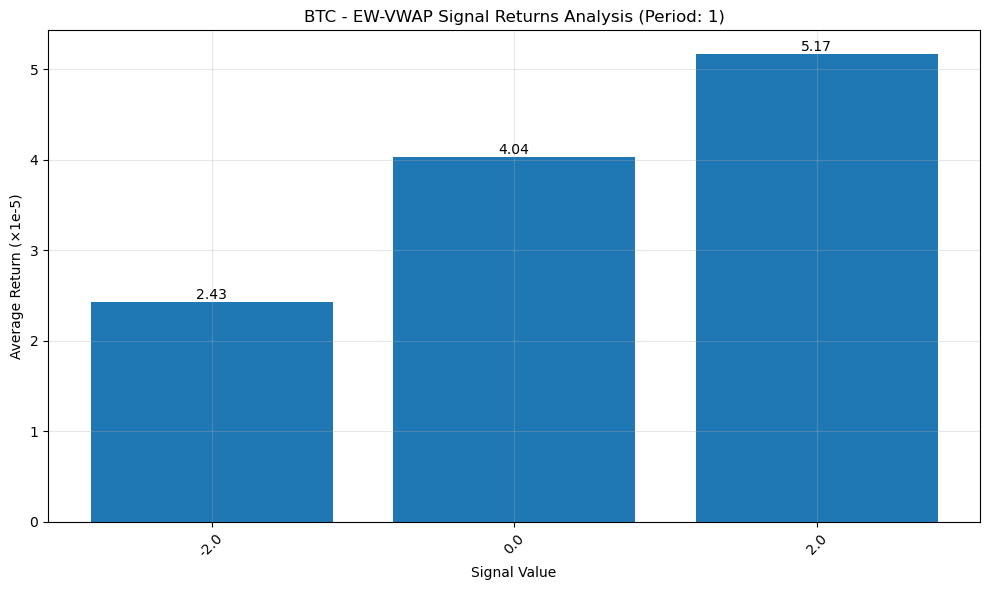

In [163]:
def plot_quintile_analysis(symbol, quintile_returns, quintile_labels, period=1):
  
    plt.figure(figsize=(10, 6))
    
    returns_to_plot = quintile_returns[period]
    
    bars = plt.bar(range(len(returns_to_plot)), returns_to_plot * 1e5)
    
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')
    
    plt.xticks(range(len(returns_to_plot)), quintile_labels, rotation=45)
    plt.title(f'{symbol.upper()} - EW-VWAP Signal Returns Analysis (Period: {period})')
    plt.xlabel('Signal Value')
    plt.ylabel('Average Return (×1e-5)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt


plot_quintile_analysis('btc', quintile_returns, quintile_labels, period=1).show()